***
# <font color=white size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

# <font color=white>1 CONHECENDO OS DADOS</font>
***

## <font color=white>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://www.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados.csv')

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [4]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [5]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [6]:
sorted(dados['Sexo'].unique())

[0, 1]

In [7]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [8]:
print('Temos idades de %s a %s anos' % (dados['Idade'].min(), dados['Idade'].max()))

Temos idades de 13 a 99 anos


#### <font color='red'>Observação</font>
***
D A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [9]:
print('Temos alturas de %s a %s metros' % (round(dados['Altura'].min(),2), round(dados['Altura'].max(),2)))

Temos alturas de 1.34 a 2.03 metros


### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [10]:
dados['Cor'].value_counts()

Cor
8    35925
2    31815
4     8391
0      357
6      352
Name: count, dtype: int64

In [11]:
frequencia = dados['Cor'].value_counts()

In [12]:
dados['Cor'].value_counts(normalize=True) * 100

Cor
8    46.752993
2    41.404217
4    10.920094
0     0.464602
6     0.458095
Name: proportion, dtype: float64

In [13]:
percentual = dados['Cor'].value_counts(normalize=True) * 100

In [14]:
tabela_frequencias = pd.DataFrame({'Frequencia' : frequencia, 'Porcentagem (%)' : round(percentual,2)})
tabela_frequencias.rename(index={0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'}, inplace=True)
tabela_frequencias.rename_axis('Cor', axis='columns', inplace=True)
tabela_frequencias.index.name = ''


In [15]:
tabela_frequencias

Cor,Frequencia,Porcentagem (%)
,,
Parda,35925,46.75
Branca,31815,41.40
Preta,8391,10.92
Indígena,357,0.46
Amarela,352,0.46


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [16]:
cor = {
    0:'Indígena', 
    2:'Branca',
    4:'Preta',
    6:'Amarela',
    8:'Parda', 
    9:'Sem declaração'
    }

sexo = {
    0:'Masculino', 
    1:'Feminino'
    }

In [17]:
tabela_cruzada = pd.crosstab(dados['Sexo'], dados['Cor'])
# tabela_cruzada.rename(index=sexo, columns=cor, inplace=True)
tabela_cruzada

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [18]:
porcentagem_cruzada = round(pd.crosstab(dados['Sexo'], dados['Cor'], normalize=True) * 100, 2)
porcentagem_cruzada.rename(index=sexo, columns=cor, inplace=True)
porcentagem_cruzada

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


In [19]:
media_cruzada = round(pd.crosstab(dados['Sexo'], dados['Cor'], aggfunc='mean', values=dados['Renda']), 2)
media_cruzada.rename(index=sexo, columns=cor, inplace=True)
media_cruzada

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [20]:
print('A menor renda que temos é de %s e a maior é %s reais.' % (dados.Renda.min(), dados.Renda.max()))

A menor renda que temos é de 0 e a maior é 200000 reais.


In [21]:
# Nas nosas faixas de valor devemos incluir o valor min e max
intervalos = [dados.Renda.min(), 1_576, 3_152, 7_880, 15_760, dados.Renda.max()]
labels = ['E','D','C','B','A']

In [22]:
frequencia = pd.cut(x = dados.Renda, 
                    bins = intervalos, 
                    labels = labels, 
                    include_lowest = True
                    ).value_counts()


percentual = pd.cut(x = dados.Renda, bins = intervalos, labels = labels, include_lowest = True).value_counts(normalize=True) * 100

In [23]:
tabela_frequencia = pd.DataFrame({'Frequência' : frequencia, 'Porcentagem (%)' : round(percentual,2)})
tabela_frequencia.sort_index(ascending=False, inplace=True)

In [24]:
tabela_frequencia

,Frequência,Porcentagem (%)
Renda,,
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [25]:
import numpy as np

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [26]:
n = dados.shape[0]
print(f'Esse dataframe contém {n} linhas')

Esse dataframe contém 76840 linhas


In [27]:
k = 1 + 10/3 * np.log10(n)
k = int(np.ceil(k)) # Devemos sempre arredondar o valor de k para cima
k

18

### Passo 2 - Criar a tabela de frequências

In [28]:
frequencia = pd.cut(x = dados.Renda, bins = k, include_lowest=True).value_counts(sort=False)
percentual = pd.cut(x = dados.Renda, bins = k, include_lowest=True).value_counts(normalize=True) * 100

pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': round(percentual,2)})

,Frequencia,Porcentagem (%)
Renda,,
"(-200.001, 11111.111]",75583,98.36
"(11111.111, 22222.222]",1023,1.33
"(22222.222, 33333.333]",165,0.21
"(33333.333, 44444.444]",30,0.04
"(44444.444, 55555.556]",17,0.02
"(55555.556, 66666.667]",7,0.01
"(66666.667, 77777.778]",0,0.00
"(77777.778, 88888.889]",4,0.01
"(88888.889, 100000.0]",7,0.01


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

In [29]:
import seaborn as sns

In [30]:
dados.Altura

0        1.603808
1        1.739790
2        1.760444
3        1.783158
4        1.690631
           ...   
76835    1.687030
76836    1.792934
76837    1.830587
76838    1.726344
76839    1.658305
Name: Altura, Length: 76840, dtype: float64

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## DataFrame de exemplo

In [31]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)

## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [32]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [33]:
df = df.reset_index()

In [34]:
df['Beltrano'].mean()

5.142857142857143

In [35]:
dados.groupby(['Sexo'])[['Renda', 'Altura', 'Idade']].mean()

,Renda,Altura,Idade
Sexo,,,
0,2192.441596,1.699443,44.046554
1,1566.847393,1.699670,44.127554


In [36]:
df

Matérias,index,Fulano,Beltrano,Sicrano
0,Matemática,8,10.0,7.5
1,Português,10,2.0,8.0
2,Inglês,4,0.5,7.0
3,Geografia,8,1.0,8.0
4,História,6,3.0,8.0
5,Física,10,9.5,8.5
6,Química,8,10.0,7.0


In [37]:
df.groupby(['index']).mean()

Matérias,Fulano,Beltrano,Sicrano
index,,,
Física,10.0,9.5,8.5
Geografia,8.0,1.0,8.0
História,6.0,3.0,8.0
Inglês,4.0,0.5,7.0
Matemática,8.0,10.0,7.5
Português,10.0,2.0,8.0
Química,8.0,10.0,7.0


In [38]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})


In [39]:
dataset.groupby(["Sexo"]).mean().loc["H"]

Idade    45.75
Name: H, dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

In [40]:
notas_fulano = df.Fulano
notas_fulano

0     8
1    10
2     4
3     8
4     6
5    10
6     8
Name: Fulano, dtype: int64

In [41]:
notas_fulano = notas_fulano.sort_values()
notas_fulano = notas_fulano.reset_index()
notas_fulano


,index,Fulano
0,2,4
1,4,6
2,0,8
3,3,8
4,6,8
5,1,10
6,5,10


In [42]:
n = notas_fulano.shape[0]
indice_fulano = (n + 1) / 2
indice_fulano

4.0

In [43]:
notas_fulano.loc[indice_fulano - 1]

index     3
Fulano    8
Name: 3, dtype: int64

In [44]:
notas_fulano.Fulano.median()
notas_fulano.Fulano.quantile(0.5)

8.0

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [45]:
notas_beltrano = df.Beltrano.sample(6, random_state = 101)
notas_beltrano = notas_beltrano.sort_values()
notas_beltrano = notas_beltrano.reset_index()
notas_beltrano

,index,Beltrano
0,2,0.5
1,1,2.0
2,4,3.0
3,5,9.5
4,0,10.0
5,6,10.0


In [46]:
n = notas_beltrano.shape[0]
indice = n / 2

In [47]:
notas_beltrano.Beltrano.loc[indice]

9.5

In [48]:
mediana = (notas_beltrano.Beltrano[indice-1] + notas_beltrano.Beltrano[indice]) / 2
print(mediana)
print(notas_beltrano.Beltrano.median())
print(notas_beltrano.Beltrano.quantile(0.5))

6.25
6.25
6.25


### Obtendo a mediana em nosso dataset

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [49]:
df.mode()

Matérias,index,Fulano,Beltrano,Sicrano
0,Física,8.0,10.0,8.0
1,Geografia,NaN,NaN,NaN
2,História,NaN,NaN,NaN
3,Inglês,NaN,NaN,NaN
4,Matemática,NaN,NaN,NaN
5,Português,NaN,NaN,NaN
6,Química,NaN,NaN,NaN


### Obtendo a moda em nosso dataset

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

C:\Users\Fabiane\AppData\Local\Temp\ipykernel_13188\1172043163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 10000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

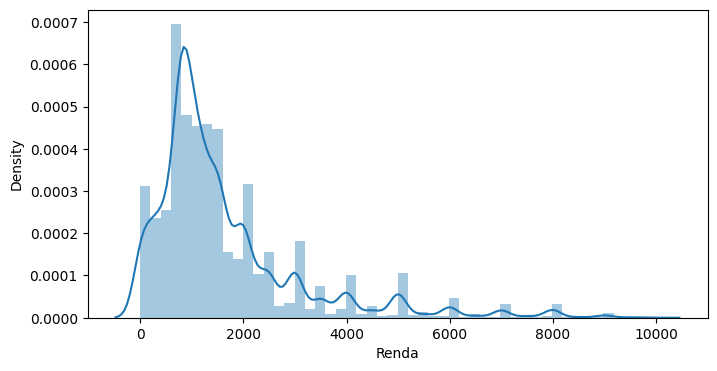

In [50]:
ax = sns.distplot(dados.query('Renda < 10000').Renda)
ax.figure.set_size_inches(8, 4)
ax

In [51]:
mode = dados.Renda.mode()[0]
mode

788

In [52]:
median = dados.Renda.median()
median

1200.0

In [53]:
mean = dados.Renda.mean()
mean

2000.3831988547631

In [54]:
mode < median < mean

True

***

### Avaliando a variável ALTURA

C:\Users\Fabiane\AppData\Local\Temp\ipykernel_13188\4138041696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: xlabel='Altura', ylabel='Density'>

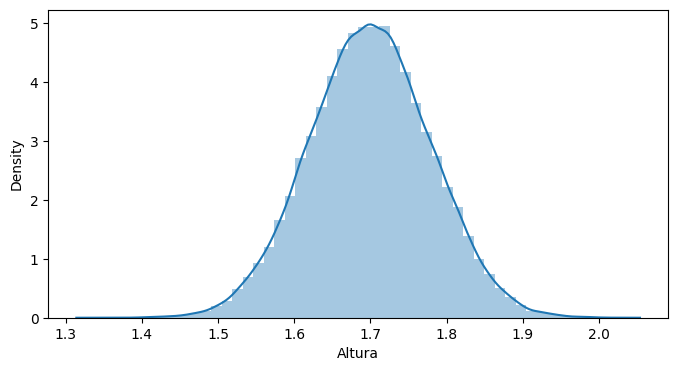

In [55]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(8, 4)
ax

In [56]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [57]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [58]:
Media = dados.Altura.mean()
Media

1.6995124540575741

In [59]:
mode = median = mean

In [60]:
dados = dados.rename(columns={'a' : 'Anos de Estudo'})
dados[dados['Anos de Estudo'] < 13]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


***

### Avaliando a variável ANOS DE ESTUDO

C:\Users\Fabiane\AppData\Local\Temp\ipykernel_13188\2474287887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados[dados['Anos de Estudo'] <= 13]['Anos de Estudo'], bins = 17)


<Axes: xlabel='Anos de Estudo', ylabel='Density'>

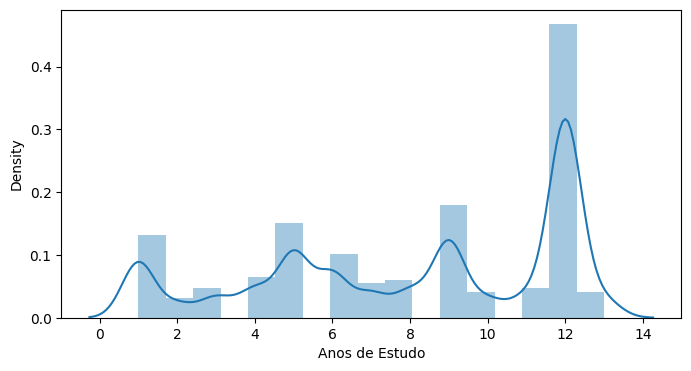

In [61]:
ax = sns.distplot(dados[dados['Anos de Estudo'] <= 13]['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(8, 4)
ax

In [62]:
mode = dados['Anos de Estudo'].mode()[0]
mode

12

In [63]:
median = dados['Anos de Estudo'].median()
median

11.0

In [64]:
mean = dados['Anos de Estudo'].mean()

In [65]:
mode > median > mean

True

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

In [66]:
dados.Renda.quantile()


1200.0

In [67]:
dados.Renda.quantile(q = [0.25, 0.5, 0.75])


0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [68]:
dados.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [69]:
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

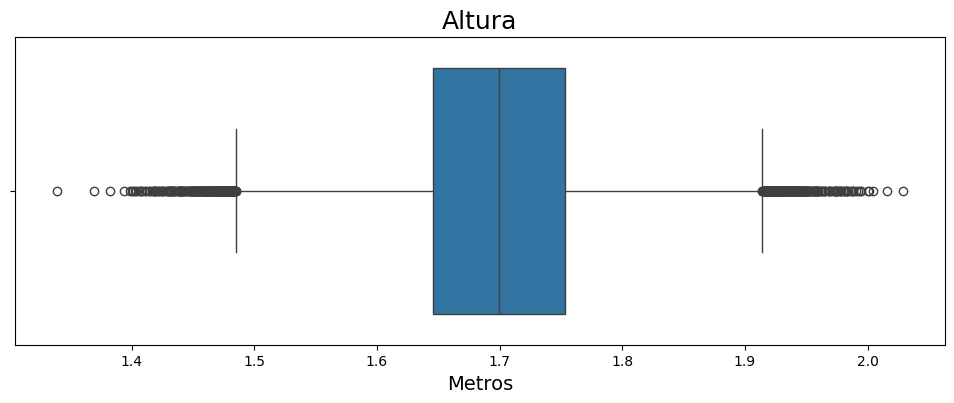

In [70]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

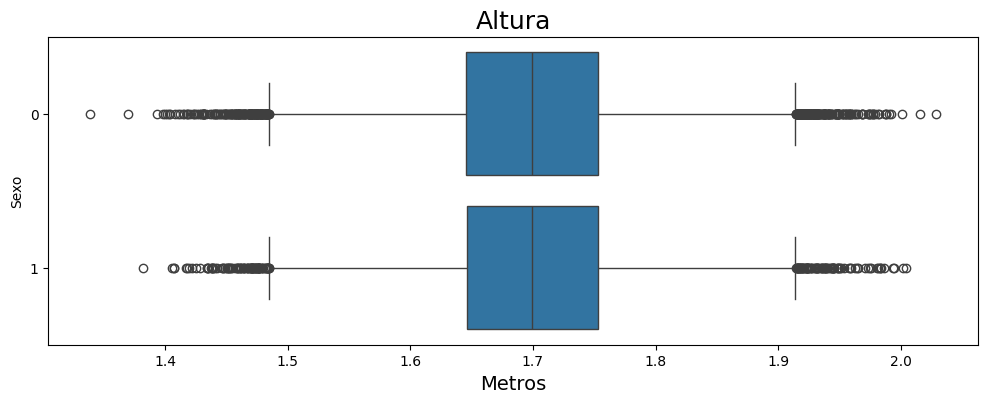

In [71]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

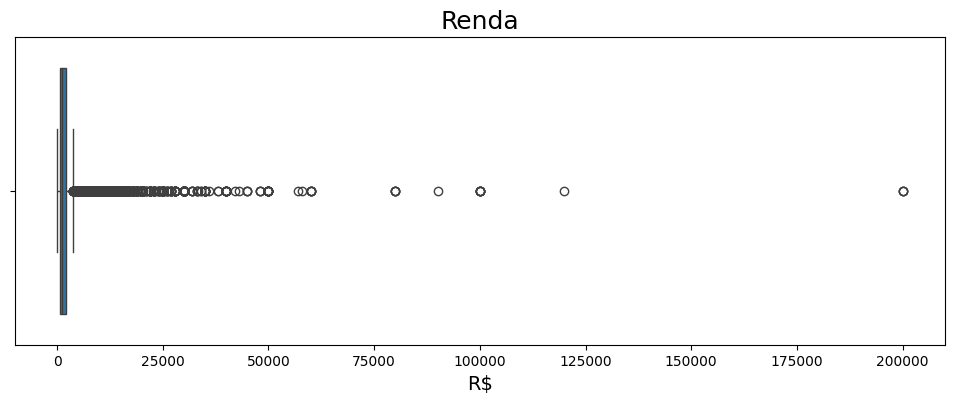

In [72]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

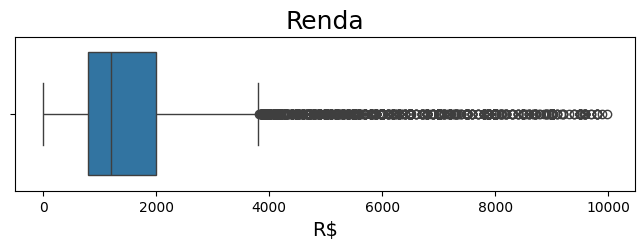

In [73]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(8, 2)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

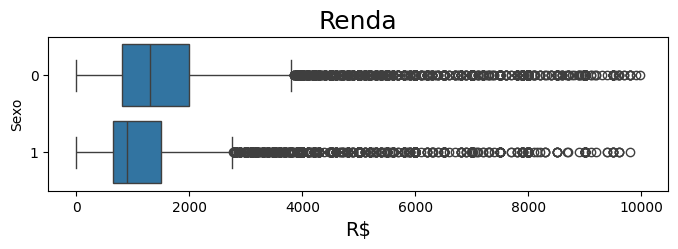

In [74]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(8, 2)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos'>

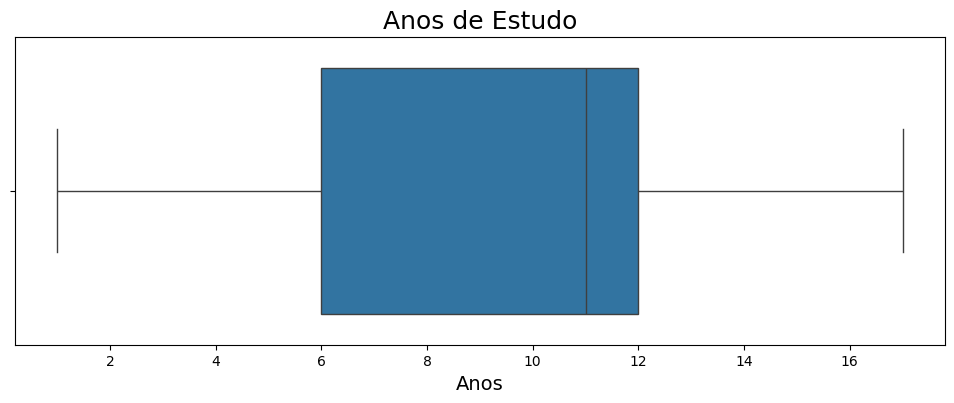

In [75]:
ax = sns.boxplot( x = 'Anos de Estudo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

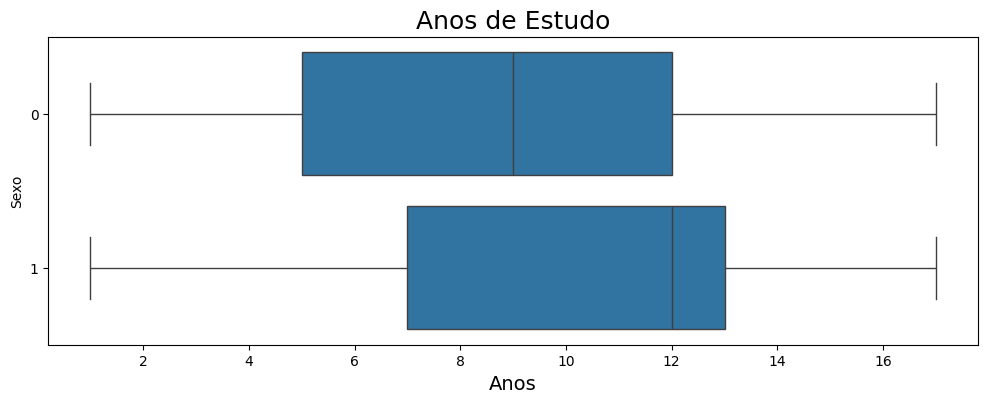

In [76]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [81]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [84]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [85]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

C:\Users\Fabiane\AppData\Local\Temp\ipykernel_13188\28910292.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nota_media_fulano = notas_fulano.mean()[0]


7.714285714285714

In [86]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [87]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [88]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [90]:
(notas_fulano['Fulano'] - notas_fulano['Fulano'].mean()).abs().mean()

1.5510204081632648

## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [91]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [92]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [93]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [96]:
np.sqrt(variancia)

2.1380899352993947

In [95]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

In [100]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [106]:
dataset.groupby('Sexo').std().iloc[1]

Idade    16.64532
Name: M, dtype: float64